# To identify custmer review is Negative or Positive
* In the processing of identifing review, i have to use
 Decision Tree Classifier, Random Forest Classifier, NLP

## Importing some required modules:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
sns.set()
from sklearn.preprocessing import LabelEncoder

## Importing our Dataset:
* Importing from our local storage

In [2]:
alexa = pd.read_csv("amazon_alexa.tsv", sep="\t")
alexa.shape

(3150, 5)

In [3]:
alexa.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [4]:
alexa.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
dtype: object

In [5]:
alexa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [6]:
alexa.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

## Checking unique values:

In [7]:
columns = []
for i in alexa.columns:
    columns.append(i)
columns

['rating', 'date', 'variation', 'verified_reviews', 'feedback']

In [8]:
for i in columns:
    print("no.of unique values in", i , "is = ", len(np.unique(alexa[i])))

no.of unique values in rating is =  5
no.of unique values in date is =  77
no.of unique values in variation is =  16
no.of unique values in verified_reviews is =  2301
no.of unique values in feedback is =  2


In [9]:
alexa.rating.value_counts().sort_index()

1     161
2      96
3     152
4     455
5    2286
Name: rating, dtype: int64

In [10]:
alexa.feedback.value_counts().sort_index()

0     257
1    2893
Name: feedback, dtype: int64

In [11]:
alexa.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [12]:
alexa.head(12)

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
5,5,31-Jul-18,Heather Gray Fabric,I received the echo as a gift. I needed anothe...,1
6,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1
7,5,31-Jul-18,Charcoal Fabric,I think this is the 5th one I've purchased. I'...,1
8,5,30-Jul-18,Heather Gray Fabric,looks great,1
9,5,30-Jul-18,Heather Gray Fabric,Love it! I’ve listened to songs I haven’t hear...,1


## Removing the "Date" column:

In [13]:
alexa.drop(labels="date", axis=1, inplace=True)

In [14]:
alexa.head()

,rating,variation,verified_reviews,feedback
0,5,Charcoal Fabric,Love my Echo!,1
1,5,Charcoal Fabric,Loved it!,1
2,4,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,Charcoal Fabric,Music,1


## Label Encoding of variation:

In [15]:
alexa.variation.value_counts().sort_values()

Walnut Finish                     9
Oak Finish                       14
White  Plus                      78
White  Show                      85
Sandstone Fabric                 90
White                            91
White  Spot                     109
Heather Gray Fabric             157
White  Dot                      184
Black  Spot                     241
Black                           261
Black  Show                     265
Black  Plus                     270
Configuration: Fire TV Stick    350
Charcoal Fabric                 430
Black  Dot                      516
Name: variation, dtype: int64

In [16]:
le = LabelEncoder().fit_transform(alexa['variation'])

In [17]:
alexa['variation'] = le

In [18]:
alexa.head()

,rating,variation,verified_reviews,feedback
0,5,5,Love my Echo!,1
1,5,5,Loved it!,1
2,4,10,"Sometimes while playing a game, you can answer...",1
3,5,5,I have had a lot of fun with this thing. My 4 ...,1
4,5,5,Music,1


# Data Visualization:

In [19]:
alexa.head(3)

,rating,variation,verified_reviews,feedback
0,5,5,Love my Echo!,1
1,5,5,Loved it!,1
2,4,10,"Sometimes while playing a game, you can answer...",1


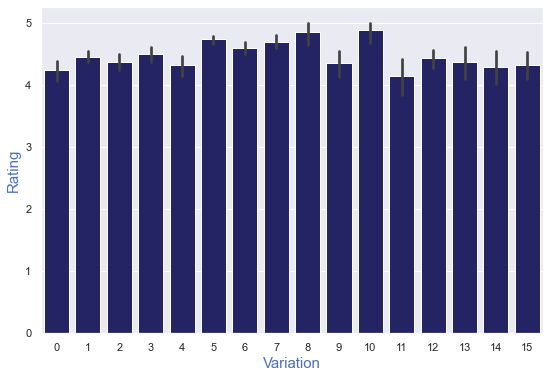

In [20]:
plt.figure(figsize=[9, 6])
sns.barplot(x='variation', y='rating', data=alexa, color='midnightblue')
plt.xlabel("Variation", fontsize=15, c="b")
plt.ylabel("Rating", fontsize=15, c="b")
plt.show()

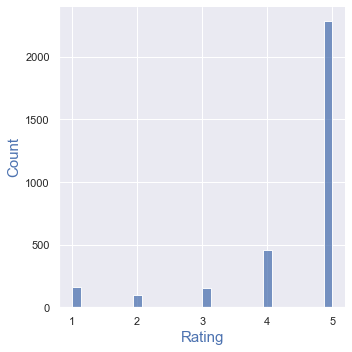

In [21]:
sns.displot(x='rating', data=alexa)
plt.xlabel("Rating", fontsize=15, c="b")
plt.ylabel("Count", fontsize=15, c="b")
plt.show()

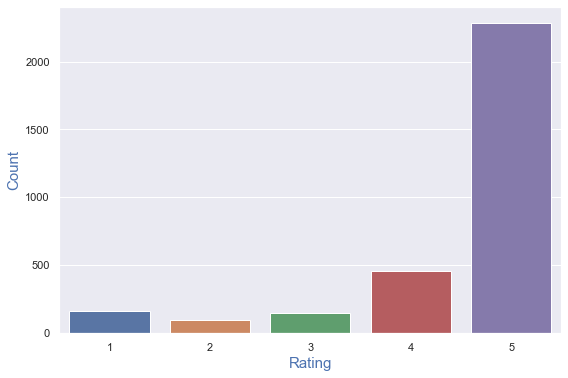

In [22]:
plt.figure(figsize=[9, 6])
sns.countplot(x='rating', data=alexa)
plt.xlabel("Rating", fontsize=15, c="b")
plt.ylabel("Count", fontsize=15, c="b")
plt.show()

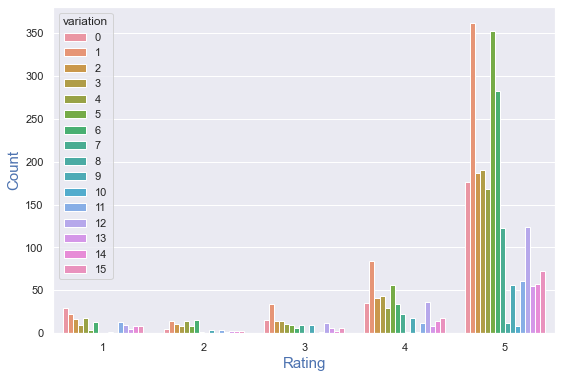

In [23]:
plt.figure(figsize=[9, 6])
sns.countplot(x='rating', hue='variation', data=alexa)
plt.xlabel("Rating", fontsize=15, c="b")
plt.ylabel("Count", fontsize=15, c="b")
plt.show()

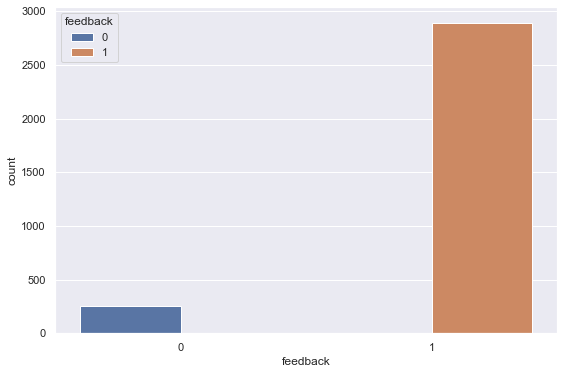

In [24]:
plt.figure(figsize=[9, 6])
sns.countplot(x="feedback", hue="feedback", data=alexa)
plt.show()

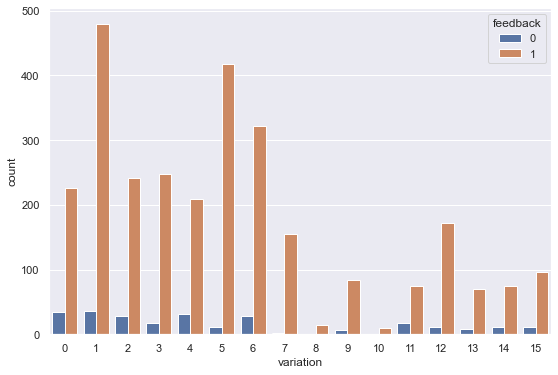

In [25]:
plt.figure(figsize=[9, 6])
sns.countplot(x="variation", hue="feedback", data=alexa)
plt.show()

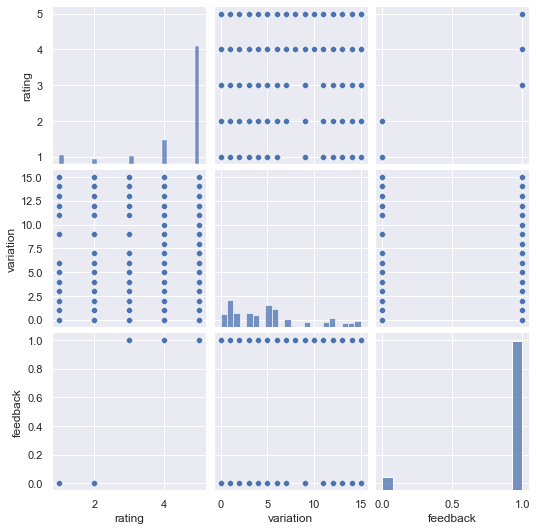

In [26]:
sns.pairplot(alexa)
plt.show()

# Neural Language Processing:
## Spliting our Data into X, y:

In [27]:
alexa.head(3)

,rating,variation,verified_reviews,feedback
0,5,5,Love my Echo!,1
1,5,5,Loved it!,1
2,4,10,"Sometimes while playing a game, you can answer...",1


In [28]:
X = alexa['verified_reviews']
y = alexa['feedback']
X[20]

'Love the Echo and how good the music sounds playing off it. Alexa understands most commands but it is difficult at times for her to find specific playlists or songs on Spotify. She is good with Amazon Music but is lacking in other major programs.'

## Importing required other modules:

In [29]:
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [30]:
Token = Tokenizer(num_words=15300, oov_token='UNK')
Token.fit_on_texts(X)

In [31]:
X = Token.texts_to_sequences(X)

In [32]:
X_pad = pad_sequences(X, maxlen=70, padding='post')
X_pad[0]

array([11,  8, 12,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0])

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.26)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2331, 70), (819, 70), (2331,), (819,))

In [34]:
X_pad[20]

array([  11,    2,   12,    6,   97,   48,    2,   24,  161,  178,  101,
          5,   21,  697,  281,  245,   20,    5,    9,  662,   75,  215,
         10,   93,    4,  210,  835,  958,   51,  263,   22,  404,   58,
          9,   48,   14,   53,   24,   20,    9, 1519,   18,   76,  896,
        663,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0])

## Decision Tree Algorithm:

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [37]:
y_prd_dt = dt.predict(X_test)
print(y_prd_dt)
print(y_test.values)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import plot_confusion_matrix, classification_report

In [39]:
c_metrix_dt = confusion_matrix(y_test, y_prd_dt)
c_metrix_dt

array([[  2,  72],
       [  6, 739]], dtype=int64)

In [40]:
Score_DT = accuracy_score(y_test, y_prd_dt)
Score_DT * 100

90.47619047619048

In [41]:
print("Train_score:", dt.score(X_train, y_train))
print("Test_score:", dt.score(X_test, y_test))

Train_score: 0.9236379236379236
Test_score: 0.9047619047619048


In [42]:
print(classification_report(y_prd_dt, y_test))

              precision    recall  f1-score   support

           0       0.03      0.25      0.05         8
           1       0.99      0.91      0.95       811

    accuracy                           0.90       819
   macro avg       0.51      0.58      0.50       819
weighted avg       0.98      0.90      0.94       819



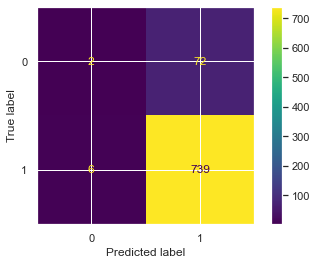

In [43]:
_ = plot_confusion_matrix(dt, X_test, y_test)

## Random Forest Algorithm:

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
rf = RandomForestClassifier(n_estimators=70, criterion='entropy', max_depth=3)
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, n_estimators=70)

In [46]:
y_pred_rf = rf.predict(X_test)
print(y_pred_rf)
print(y_test.values)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [47]:
c_metrix_rf = confusion_matrix(y_test, y_pred_rf)
c_metrix_rf

array([[  0,  74],
       [  0, 745]], dtype=int64)

In [48]:
Score_RF = accuracy_score(y_test, y_pred_rf)
Score_RF * 100

90.96459096459097

In [49]:
print("Train_score:", rf.score(X_train, y_train))
print("Test_score:", rf.score(X_test, y_test))

Train_score: 0.9214929214929215
Test_score: 0.9096459096459096


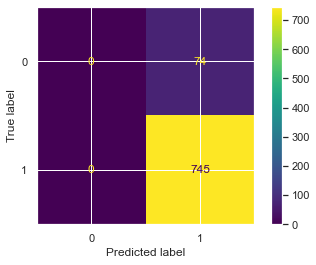

In [50]:
_ = plot_confusion_matrix(rf, X_test, y_test)

In [51]:
y_test.values[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [52]:
y_pred_rf[0:5]

array([1, 1, 1, 1, 1], dtype=int64)